### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 13th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

In [27]:
from PIL import Image
from IPython.display import display
import os
os.chdir('/home/hoelsczj/repos/astr_8070_S24/coursework/student_folders/zachary_hoelscher/')

1. $a = f(w_1 x_1 + w_2 x_2 + b_1)$ and Output=$w_3 a $
   

Here we have $f(x)=x$. $b_1$ is the neuron bias for the hidden layer. My impression is that the biases are zero here. I see that the weights are $w_1 = -0.38$, $w_2 = 0.45$ and $w_3 = 0.28$.

Output = w_3(w_1 x_1 + w_2 x_2 + b_1) 

Thus Output = $0.28(-0.38 x_1 + 0.45 x_2)$

Since it is only applying linear functions to the data, I would not expect it to learn nonlinearities, though I am unsure.

From running the network, this seems to be true. The output is divided into blue and orange regions separated by parallel lines.



SRT: Very good, Zachary.

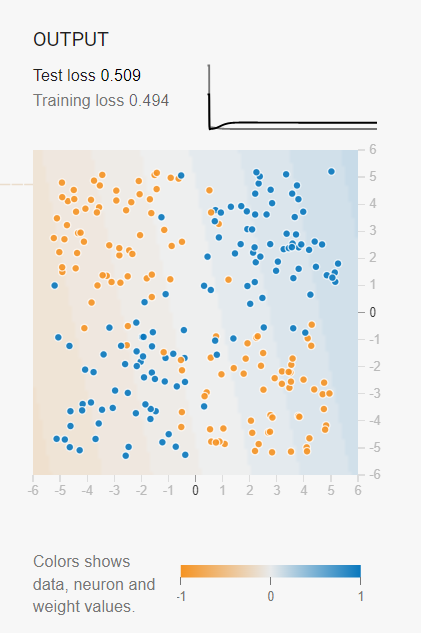

In [4]:
img = Image.open('Pic1.png')
display(img)

Now using data with a nonlinear shape, I see that it is unable to effectively classify it. It colors the whole field light orange. 

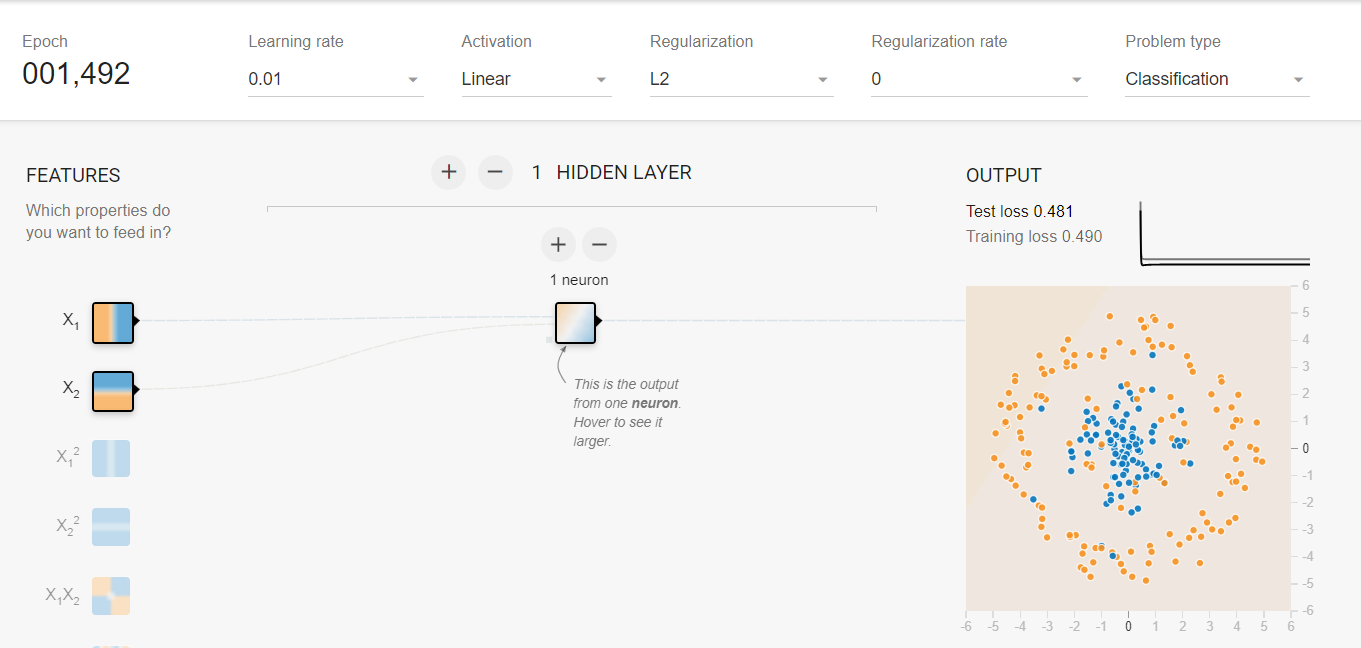

In [5]:
img2 = Image.open('Pic2.png')
display(img2)

Part 2:
It seems that it can pick up on nonlinearities now, as after I switch to a different dataset (one that has a ring of points around a circle of points) it is able to pick up on a difference between these. Two neurons doesn't seem to be enough to effectively handle that second dataset, though. I show the original dataset first, then the second one. For the original dataset, it does a somewhat okay job at classifying the points. 

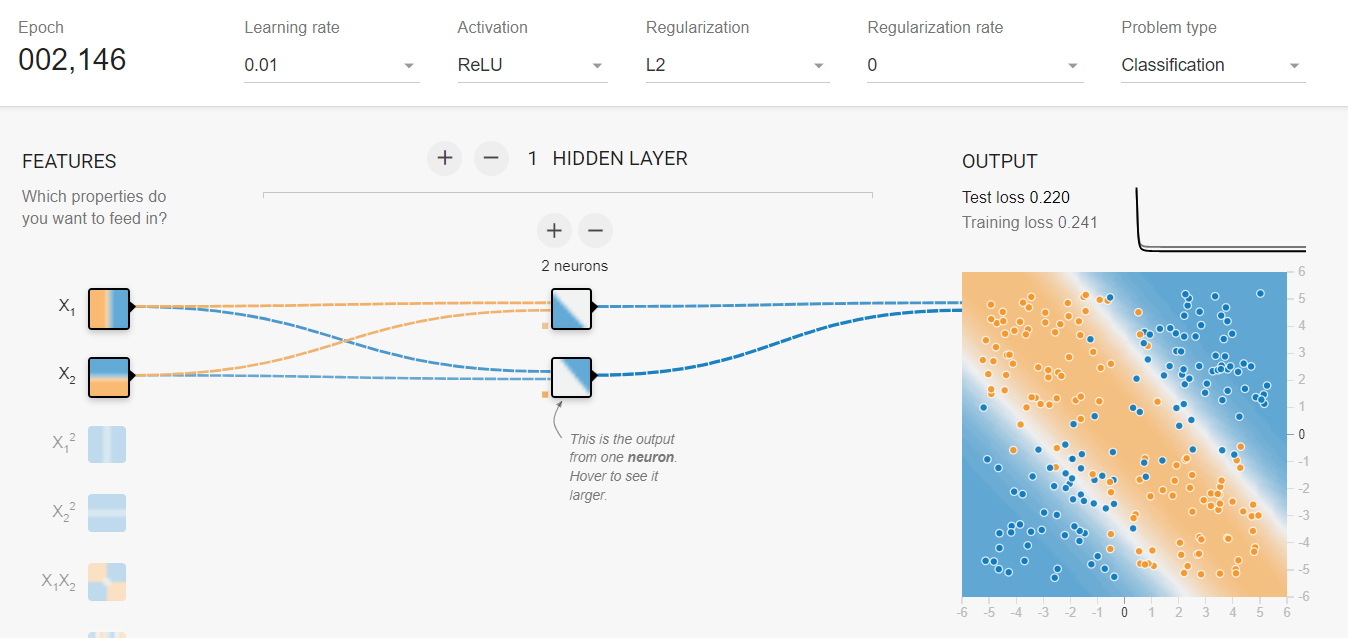

In [6]:
img3 = Image.open('Pic3.png')
display(img3)

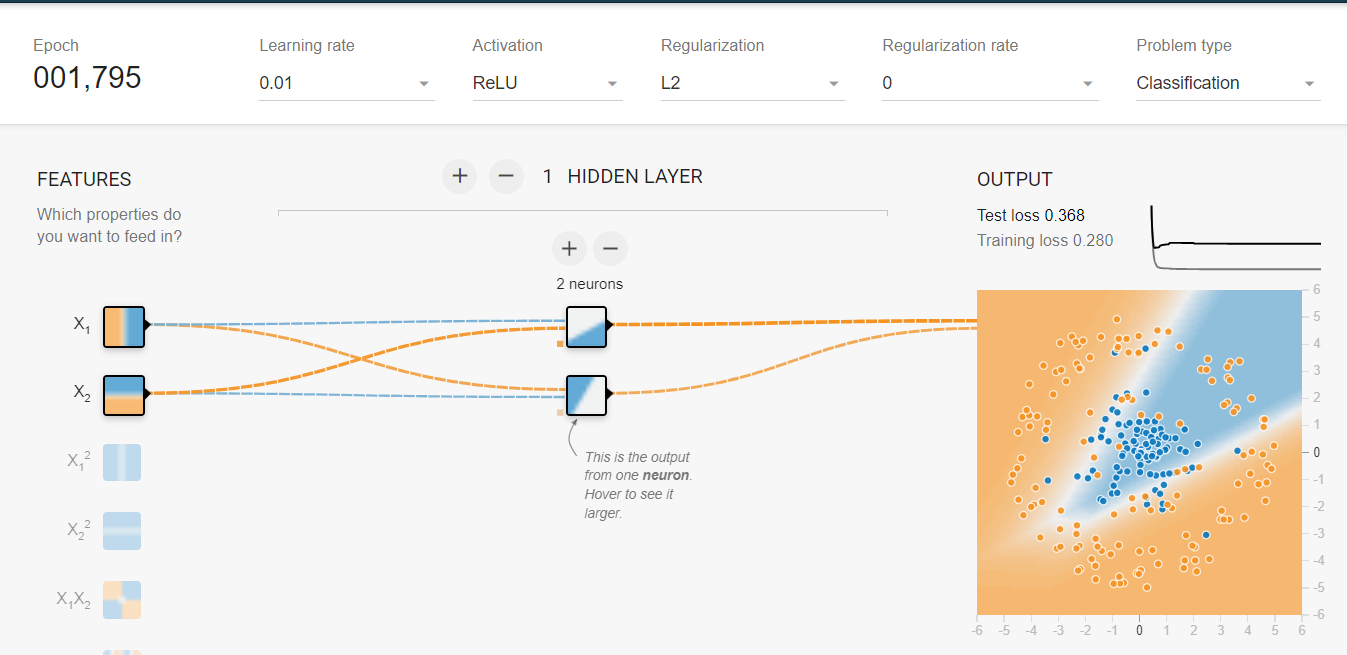

In [7]:
img4 = Image.open('Pic4.png')
display(img4)

It does not do a great job at classifying these, though it does pick up on a difference between the points in the central and outer regions. The model with linear activation functions is unable to do that. 

Re-running:

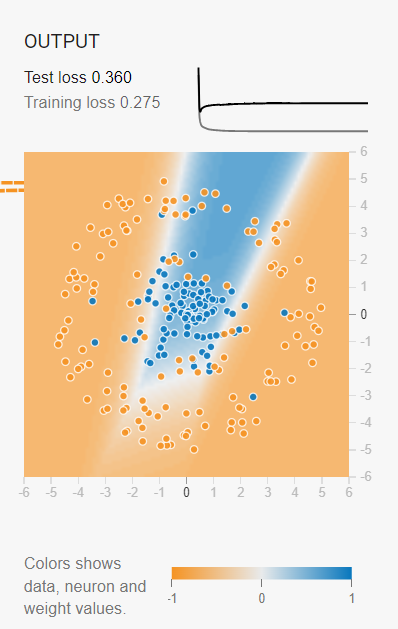

In [8]:
img5 = Image.open('Pic5.png')
display(img5)

I see that this seems to be able to identify that the dots in the middle are different than the dots on the outside, which it could not do with linear activation functions. It still mis-classifies some of the ones on the outer ring as being in the blue area though. 

Re-running again, and using a different dataset for another run. We see that for the spiral shape, it is pretty terrible at classifying things. 

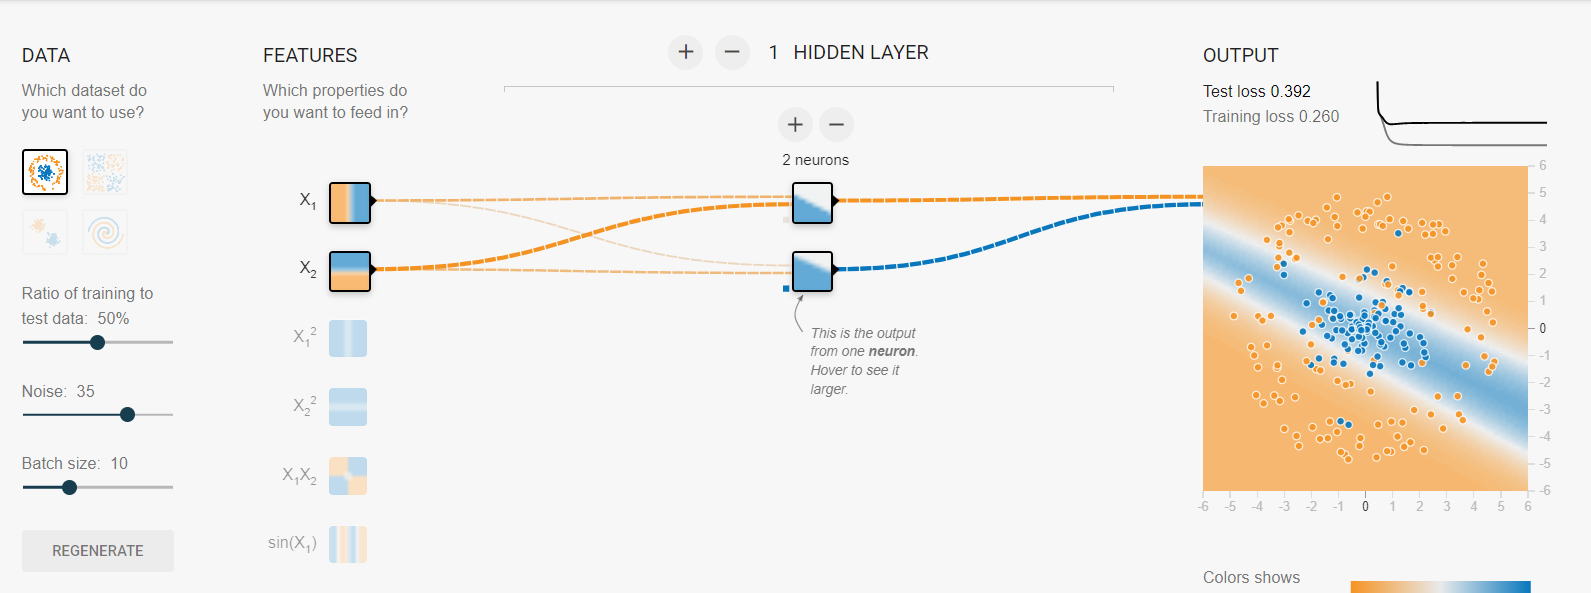

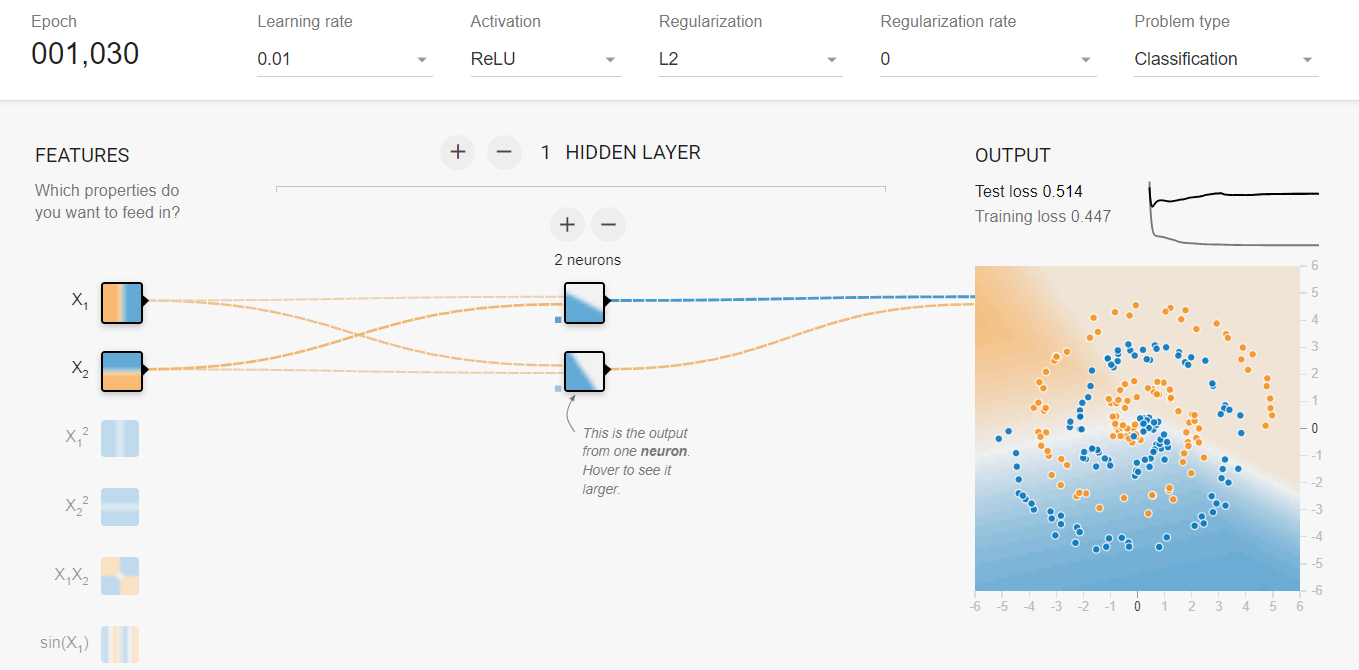

In [28]:
img5a = Image.open('Pic5a.png')
display(img5a)

img5b = Image.open('Pic5b.png')
display(img5b)

Part 3:
This now works nicely for identifying the circle of points in the middle. The output is stable between runs. When I try switching back to the linear activation, it fails to classify properly, so it does indeed seem that a nonlinear activation is needed to see these nonlinear features. I also see the results have improved with more neurons in the hidden layer. 

Using RELU:

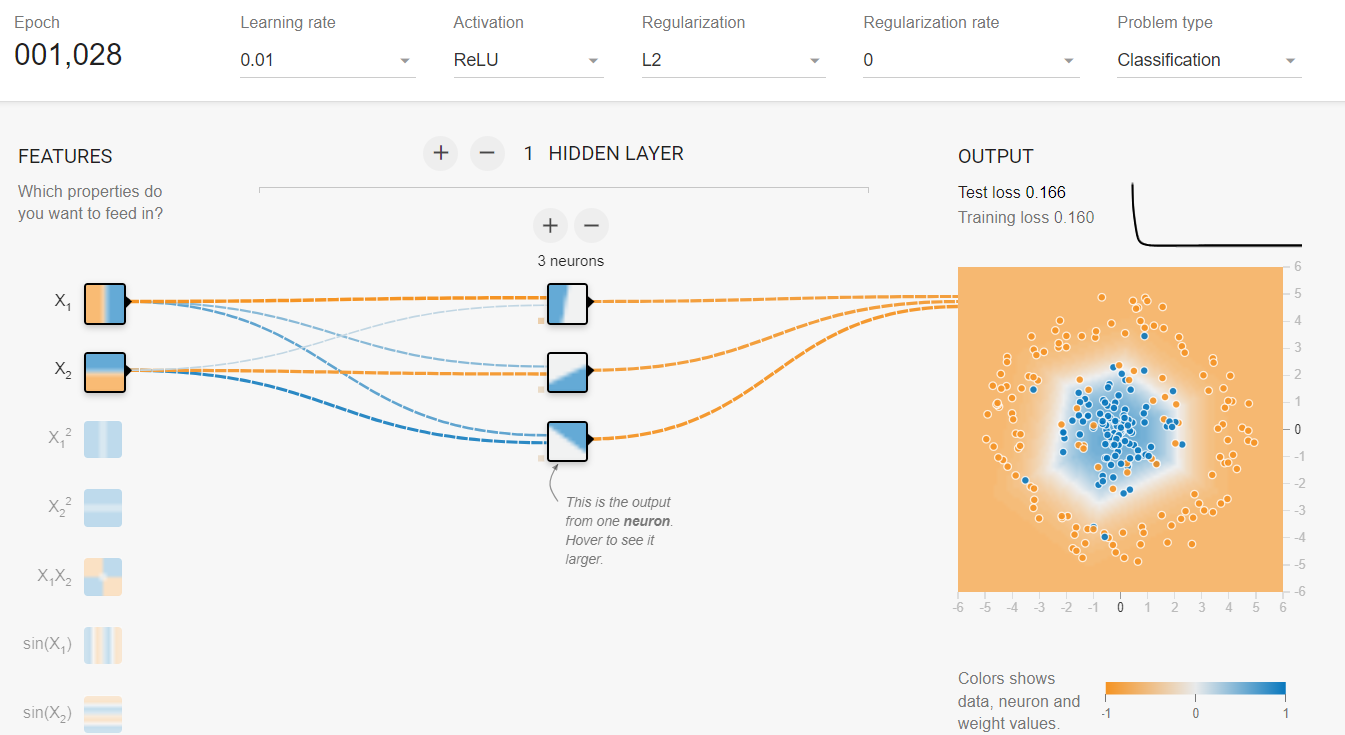

In [9]:
img6 = Image.open('Pic6.png')
display(img6)

Back to linear activation with three neurons, to show it fails:

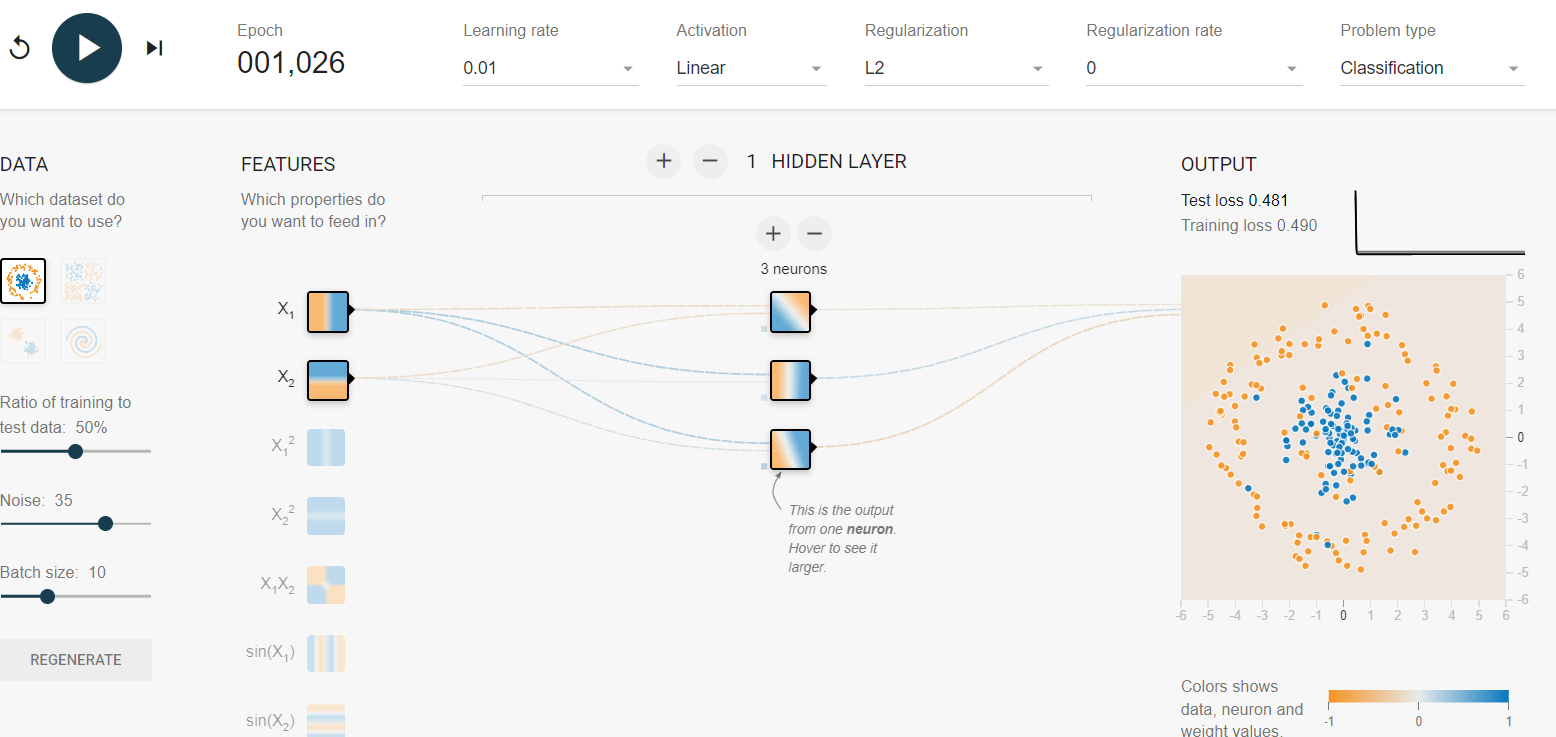

In [10]:
img7 = Image.open('Pic7.png')
display(img7)

Part 4:

Two hidden layers, 3 neurons each:

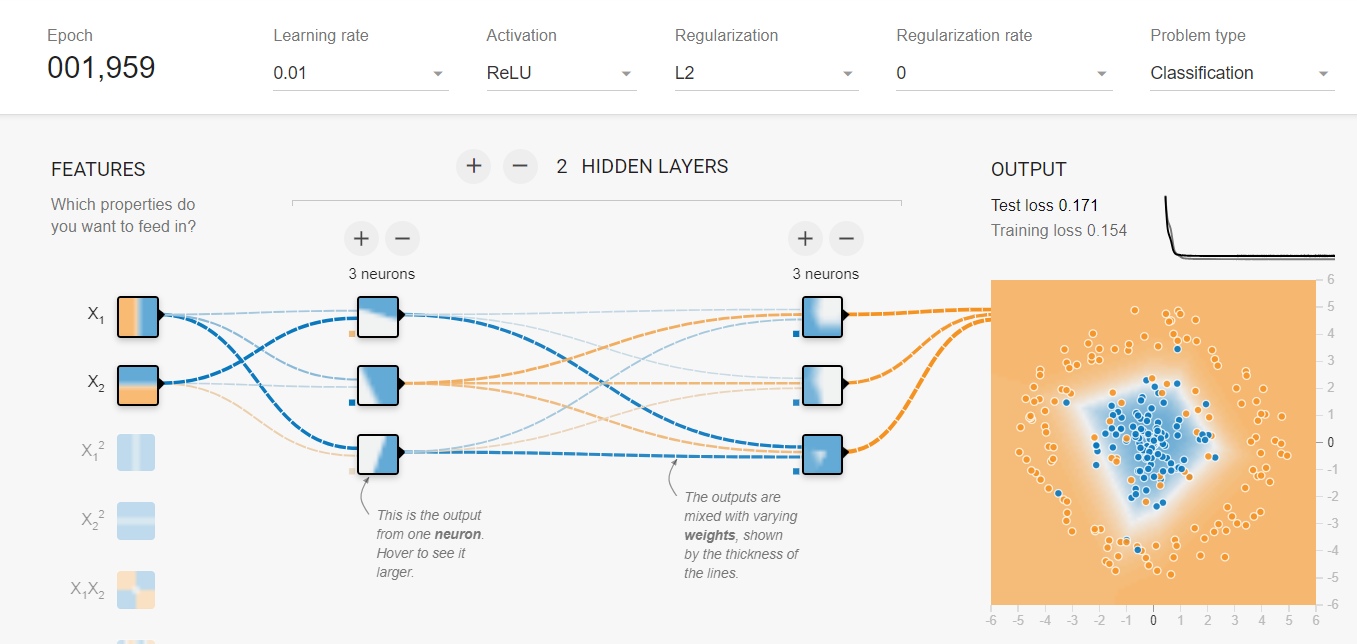

In [11]:
img8 = Image.open('Pic8.png')
display(img8)

Two hidden layers, three and one neurons each:

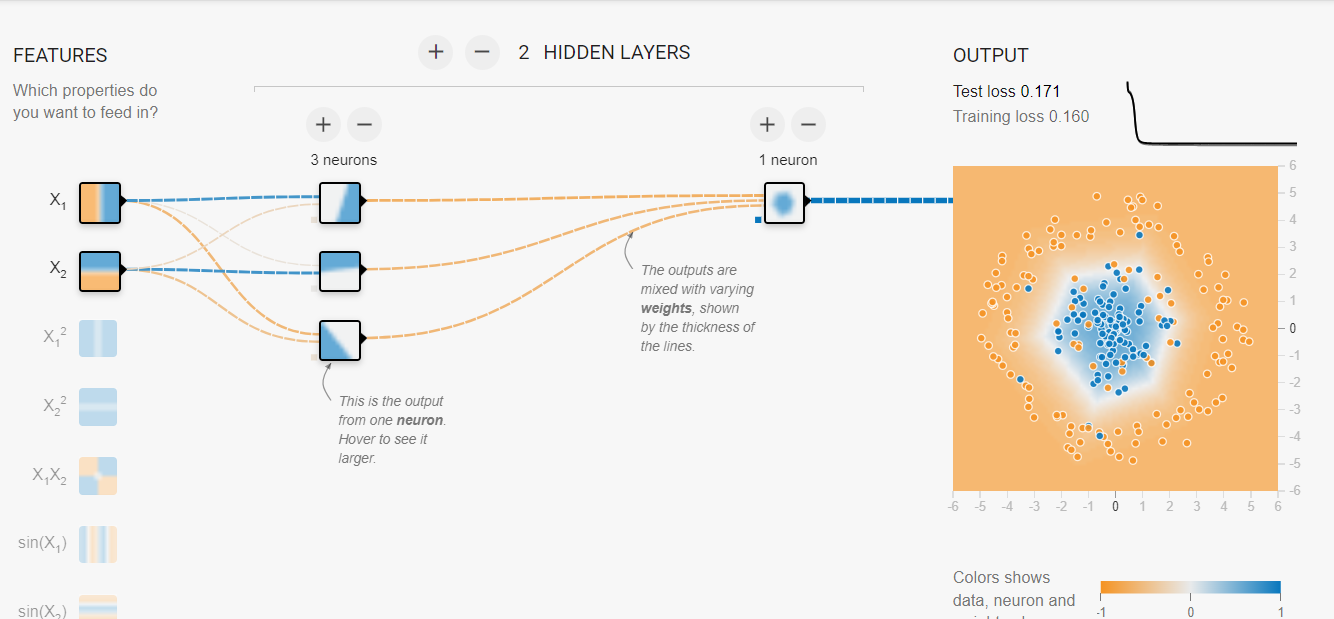

In [12]:
img9 = Image.open('Pic9.png')
display(img9)

From playing with it, three neurons in a single hidden layer seems to be the minimum to get the test loss below 0.177. (Picture of this in Part 3.)

SRT: Well done!

Part 5: Using the suggested model, I see no large improvement over the simpler case that uses one hidden layer with three neurons. They seem to converge in almost the same number of epochs, about as often, and as well. This surprises me. I was expecting an improvement. If there is an improvement, it is small. From looking at the loss curve plots, it seems the simpler model converges a bit faster. I will say that the more complex one draws a rounder blue circle, though its test loss is about the same in the end. 

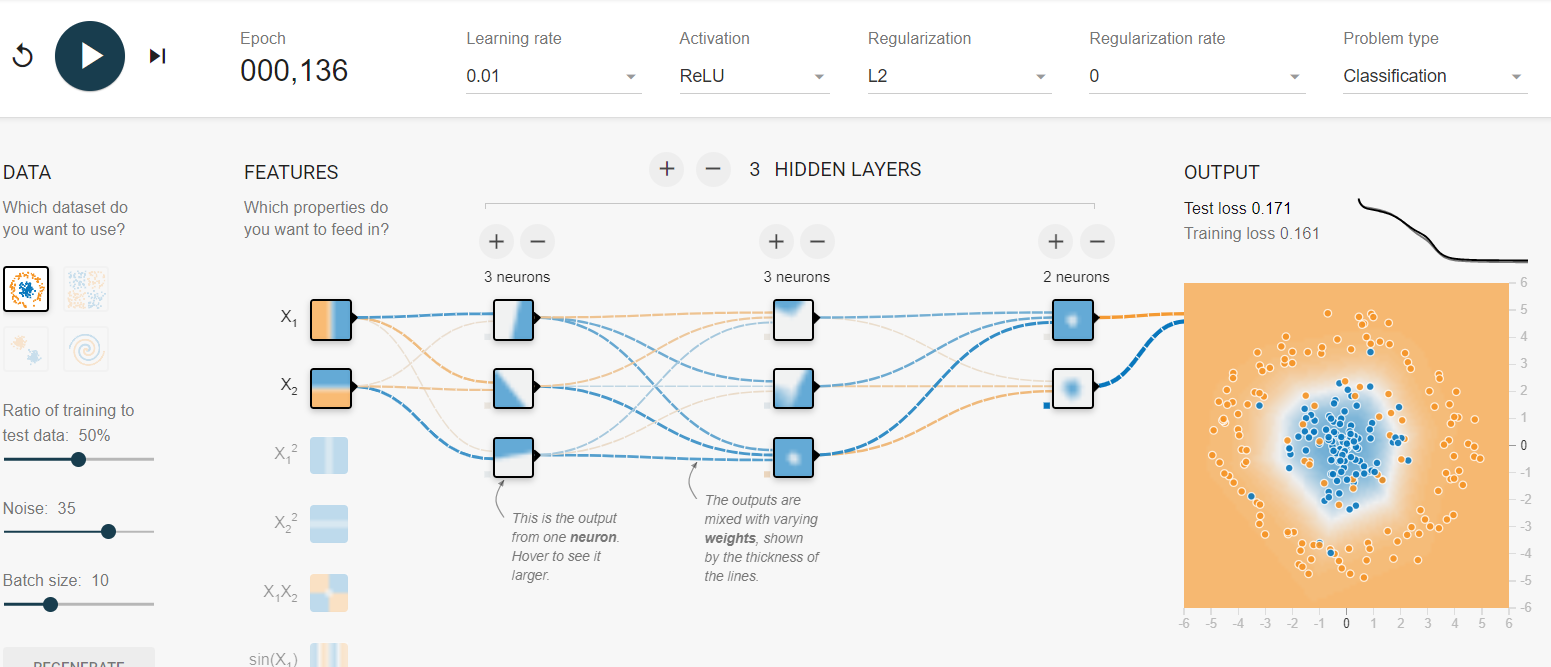

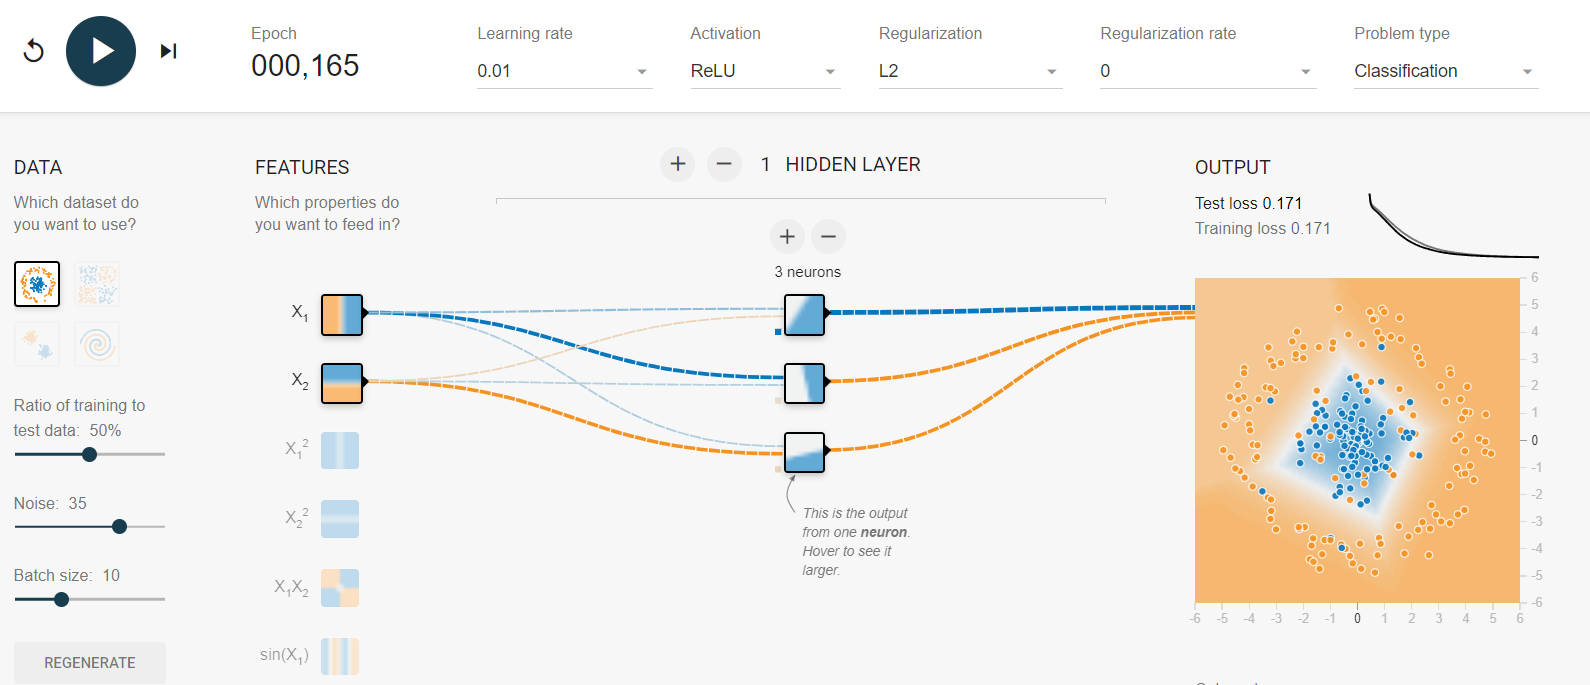

In [13]:
img10 = Image.open('Pic10.png')
display(img10)

img11 = Image.open('Pic11.png')
display(img11)

SRT: Wow, you explored more datasets than I even intended in the question. Well done, and good commentary.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [2]:
#loading data
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
os.chdir('/home/hoelsczj/repos/astr_8070_S24/coursework/homeworks/hw_data/')
data=np.load('hw8_data_1.npy')
print(data.dtype.names) #column titles 
print(data) #the data values 

('u', 'g', 'r', 'i', 'z', 'specClass', 'redshift', 'redshift_err')
[(19.46392, 18.89363, 18.85225, 18.8241 , 18.53599, 'QSO', 2.312959  , 1.925222e-04)
 (18.33262, 16.29118, 15.3018 , 14.81997, 14.45467, 'GALAXY', 0.05187586, 1.396275e-05)
 (18.85941, 17.01412, 15.97252, 15.51533, 15.11948, 'GALAXY', 0.09769295, 1.805014e-05)
 ...
 (18.76492, 18.12947, 18.04838, 17.94089, 17.677  , 'QSO', 2.267401  , 1.777254e-04)
 (19.36827, 19.06754, 18.9035 , 18.84508, 18.82694, 'QSO', 1.407278  , 8.702147e-04)
 (19.37275, 18.82985, 18.69858, 18.53639, 18.43456, 'QSO', 0.6865192 , 1.417279e-04)]


/tmp/ipykernel_109583/3690067445.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


We want every other tenth row, so I take that to mean every 20th row. 

In [3]:
NewData=data[0::20] #take every 20th, or every other 10th row

#Doing this with a loop instead of vectorizing it because the data is an array of tuples rather than 2d array.
#Had trouble converting it to a 2d array.
u=[]
g=[]
r=[]
i=[] #initializing empty lists 
z=[]
specClass=[]
redshift=[]
redshift_err=[]
for element in NewData:
    u.append(element[0])
    g.append(element[1]) #appending relevant elements to each list 
    r.append(element[2])
    i.append(element[3])
    z.append(element[4])
    specClass.append(element[5])
    redshift.append(element[6])
    redshift_err.append(element[7])
u=np.array(u) #converting lists to arrays 
g=np.array(g)
r=np.array(r)
i=np.array(i)
z=np.array(z)
redshift=np.array(redshift)
specClass=np.array(specClass)
u_minus_g=u-g
g_minus_r=g-r
r_minus_i=r-i
i_minus_z=i-z

types, counts = np.unique(specClass, return_counts=True) #finding number of elements of each unique type 
number_galaxies=counts[0] #two unique types, one is galaxies, one is quasars 
number_quasars=counts[1]

print("Number Galaxies: ")
print(number_galaxies) #printing number of quasars and number of galaxies 
print("Number Quasars: ")
print(number_quasars)

Number Galaxies: 
2130
Number Quasars: 
370


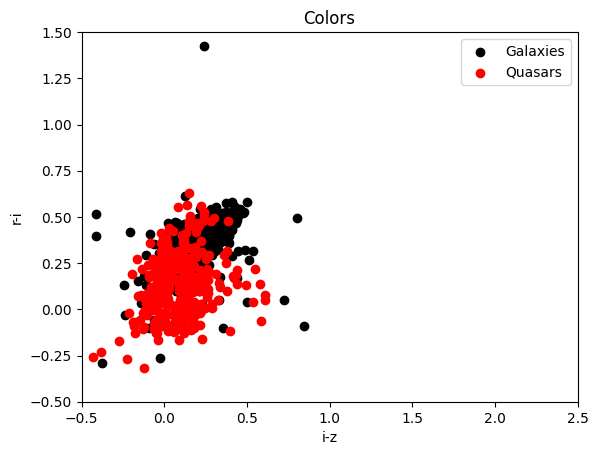

In [4]:
Galaxies_Indicies=np.where(specClass=="GALAXY") #find all indicies where it is a normal galaxy 
Quasars_Indicies=np.where(specClass=="QSO") #find all indicies where it is a quasar 
r_minus_i_galaxies=r_minus_i[Galaxies_Indicies]
r_minus_i_quasars=r_minus_i[Quasars_Indicies] #pull out all elements that are galaxies or quasars to separate them 
i_minus_z_galaxies=i_minus_z[Galaxies_Indicies]
i_minus_z_quasars=i_minus_z[Quasars_Indicies]

plt.scatter(i_minus_z_galaxies, r_minus_i_galaxies, label="Galaxies", color='k') #scatter plot, color coded with legend 
plt.scatter(i_minus_z_quasars, r_minus_i_quasars, label="Quasars", color='r')
plt.xlabel('i-z')
plt.ylabel('r-i')
plt.title('Colors')
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1.5)
plt.legend()
plt.show()

In [5]:
X=np.transpose(np.vstack((r_minus_i, i_minus_z))) #colors in columns 
Target=np.zeros(len(specClass)) #default all elements to zero 
Target[Quasars_Indicies]=1 #change elements for quasar to 1 
print(Target)

[1. 1. 0. ... 0. 0. 0.]


In [6]:
import sklearn.model_selection
X_train, X_test = sklearn.model_selection.train_test_split(X, test_size=0.2, random_state=42) #train test split, 20 percent set aside for testing 
y_train, y_test = sklearn.model_selection.train_test_split(Target, test_size=0.2, random_state=42) #train test split, 20 percent set aside for testing 
print(len(X_train))
print(len(X_test))

2000
500


SRT: I think this will have the same issues as your train/test splitting in HW8. The split must be done consistently, and within the same operation, for both the data features and labels. I think your labels and features for entries will be scrambled. -2 points.

In [29]:
from sklearn import preprocessing

Xtrain_scaled = preprocessing.scale(X_train) #scaling data before the fit 
Xtest_scaled = preprocessing.scale(X_test)
Xscaled = preprocessing.scale(X)


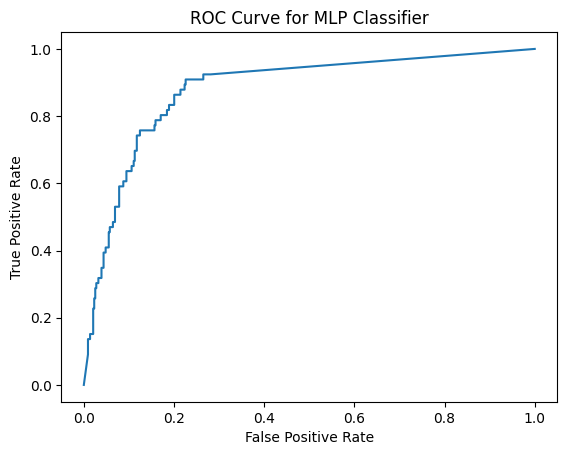

In [30]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, roc_curve

clf = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', solver='sgd', max_iter=1000, random_state=42)
#hidden layer sizes of 5 and 2, ReLu activation, stochastic gradient descent solver, 1000 max iterations

clf.fit(Xtrain_scaled, y_train) #fit the model 
#Plot ROC curves 
plt.plot(roc_curve(y_test, clf.predict_proba(Xtest_scaled)[:,1])[0], roc_curve(y_test, clf.predict_proba(Xtest_scaled)[:,1])[1]) #add a line to the plot 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for MLP Classifier")
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

grid = GridSearchCV(MLPClassifier(), parameters) 
grid.fit(Xscaled,Target) 
solver_opt = grid.best_params_['solver'] #best solver 
hidden_layer_size_opt = grid.best_params_['hidden_layer_sizes']
activation_opt = grid.best_params_['activation']
max_iter_opt = grid.best_params_['max_iter']

/home/hoelsczj/miniconda3/envs/SNR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/hoelsczj/miniconda3/envs/SNR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/hoelsczj/miniconda3/envs/SNR/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarni

In [19]:
print("Optimum Solver: ")
print(solver_opt)

print("Optimum Hidden Layer Size: ")
print(hidden_layer_size_opt)

print('Optimum Activation: ')
print(activation_opt)

Optimum Solver: 
adam
Optimum Hidden Layer Size: 
(5, 5, 5)
Optimum Activation: 
relu


Note that the other parameters (max iter and random state) weren't varied, so they are just 1000 and 42. 

In [20]:
print("Best Score: ")
print(grid.best_score_)

Best Score: 
0.9359999999999999


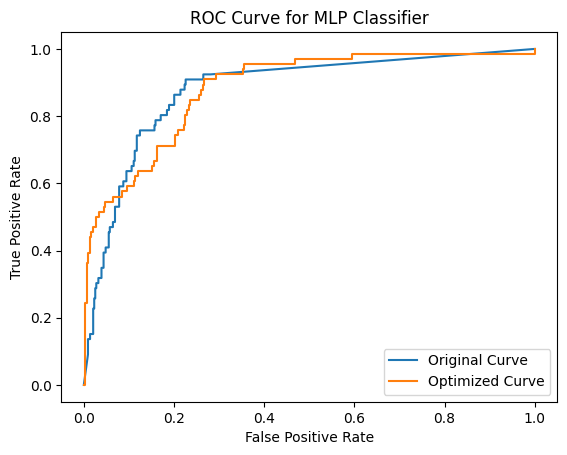

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, roc_curve

clf_original = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', solver='sgd', max_iter=1000, random_state=42)
clf_original.fit(Xtrain_scaled, y_train) #fit with original parameter values 

clf_optimized = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='relu', solver='adam', max_iter=1000, random_state=42)
clf_optimized.fit(Xtrain_scaled, y_train) #fit using the optimum parameter values 

plt.plot(roc_curve(y_test, clf_original.predict_proba(Xtest_scaled)[:,1])[0], roc_curve(y_test, clf_original.predict_proba(Xtest_scaled)[:,1])[1], label='Original Curve') #add a line to the plot 
plt.plot(roc_curve(y_test, clf_optimized.predict_proba(Xtest_scaled)[:,1])[0], roc_curve(y_test, clf_optimized.predict_proba(Xtest_scaled)[:,1])[1], label='Optimized Curve') #add a line to the plot 
#plotting the ROC curves for the original and optimized case, with a legend 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve for MLP Classifier")
plt.show()

Doesn't seem to be a huge difference. The optimized one has a bit of an odd shape around False Positive Rate = 0.2, though. 

SRT: Good job overall, Zachary. Apart from the train/test splitting, all operations were done correctly.